# CS 124 Programming Assignment 3: Logistic Regression (`Winter 2023`)

In the last assignment, you have used a `Naive Bayes` classifier to classify 
disaster aid messages.
In this assignment, you are going to perform the same task using a
`Logistic Regression` (`LR`) classifier.
We will evaluate your model using the same metrics as the previous assignments.
Because we are sharing the data and the task between the two assignments, 
many sections of this notebook will be the same as those in our previous 
assignment.

Let's remember our task:
Victims of natural disasters have urgent needs for food, water, shelter, medicine, and other forms of aid.
These needs are often communicated through text messages, social media posts, and local newspapers. Because of their
ability to automatically process large amounts of text, `NLP` techniques can play an important role in ensuring that people receive potentially life-saving aid.
Our goal will be to perform text classification on messages sent in the aftermath of natural disasters.

We will be utilizing a `Python` module called `NumPy` in this assignment, 
similar to the last one.
If you feel like you need a refresher on `NumPy`, you can always revisit the 
`NumPy` tutorial (`numpy_tutorial.ipynb`) we shared along with the previous 
assignment.

**You are encouraged to work with a partner!** We want the assignments in `CS 124` to bring you joy.
One way to ensure this is to work with a partner!
You are free to work with one other partner in our assignments.
If you choose to work with a partner, we ask that each partner work on each part of the assignment in jointly instead of splitting parts.
The partnership decision is independent for each assignment, so you can choose to work alone, work with the same partner or work with a different partner in the future assignments, which is a good way to meet your fellow classmates!

<a id="contents"></a>
## Contents

Listed below are the contents of the assignment. In the `Data Exploration` 
section, you will look into the Disaster Aid Classification (`Triage`) dataset 
we will use in the assignment.
In the `Logistic Regression` section, you will implement a `Logistic Regression`
classifier to determine whether a message sent in the aftermath of a natural 
disaster is about aid.
In the `Tips` section, we share some useful tips for your implementation.
In the `Evaluation on the Triage Dataset` section, you will evaluate your 
`Logistic Regression` classifier on the `Triage` dataset.
Please read through all of this notebook before you start working through the assignment.
In the last section, we will breifly touch on the `hyperparameters` you can adjust for your `Logistic Regression` classifier. 
Note that the links may not work on `Google Colab`.

* [`Part 1. Data Exploration`](#data_exploration)
* [`Part 2. Logistic Regression`](#logistic_regression)
* [`Part 3. Evaluation on the Triage Dataset`](#evaluation_triage)
* [`Part 4. Note on Hyperparameters`](#hyperparameters)



<a id="roadmap"></a>
## Roadmap






As an overview, there are `4` methods you need to implement in this assignment:
* In `Part 2.1 Sigmoid`: **`sigmoid()`** function
* In `Part 2.2 Logistic Loss`: **`logistic_loss()`** function
* In `Part 2.4 Logistic Regression Classifier`: **`__init__()`**, **`train()`**, **`classify()`**, and **`get_weights()`** methods of the **[`LogisticRegressionClassifier(Classifier)`](#logistic_regression)** class
* In `Part 3.2 Sanity Check`: **`reflection_response()`** function, which is a short answer question

Here is how your implementation will be evaluated:
* In `Part 3. Evaluation on the Triage Dataset`, your 
  implementation will be evaluated with respect to the `triage` dataset.
  * In `Part 3.1 Accuracy`, you will check the accuracy of your `Logistic Regression` 
    model both on the `train` and `dev` sets, each with and without stop words.
    Hence, there will be a total of `4` accuracy tests in this section.
    We recommend going back to your implementation if the accuracies you get in 
    this section are far from what we have provided.
    In addition to what you will see in this section, our autograder will run  
    `2` more tests on the same dataset, this time using a `test` set, with or
    without stop words.
    To see the autograder tests, you can submit your notebook on `Gradescope`.
  * In `Part 3.2 Sanity Check`, we will check the answer you include in the `reflection_response()` function. 

<a id="submitting"></a>
## Submitting

**Submit your empty assignment to Gradescope now to see the autograder output!**
You will submit your assignment via [`Gradescope`](www.gradescope.com), where we have an autograder set up.
You can name your leaderboard submission whatever you would like!
You can submit your assignment any number of times before the deadline.
As a general rule of thumb, we recommend submitting early and often in any `Computer Science` class if you have the option, to prevent any last minute errors with autograders.
Submitting early also helps gauge how you are doing on the visible test cases of the autograder and gives you a chance to fix your submission accordingly.
In fact, start with submitting your assignment now (even if you haven't coded anything), so that you are familiar with the submission process and know what kind of autograder feedback is available to you.
You can re-submit as you make progress.
Don't forget to update your submission with your final version once you are done!

**Partners.**
You are welcome (and encouraged) to work with one partner.
If you do work with a partner, only one of you needs to submit the assignment on `Gradescope` and tag the other as a group member.

**Environment.**
Before you submit, make sure your code works in the environment described in the [`Environment Check`](#environment_check) section, as this is the environment our autograder will be run on.
If you have completed the setup steps in `PA0` and run this notebook in the `cs124` environment you created according to the instructions, you are good!
Note that you must not use any other dependencies (such as other `Python` modules), as doing so may cause the autograder to fail!

**Saving Your Notebook**.
Make sure to save the recent changes in your notebook before you submit.
This is especially important if you are running your notebook on `Google Colab` as connection quality sometimes cause your notebook to be in an unsaved state.
The following error is also common on `Google Colab`, if the file you are working on is open in more than one tabs, so we are recommending keeping copies of your work if you are collaborating with your partner on `Colab`.
```
This file was updated remotely or in another tab. To force a save, overwriting the last update, select Save from the File menu
```





**Files.**
Once you are done, you only need to submit the file listed below.
**DO NOT** alter the file name.
```
pa3.ipynb
```

**Custom Dependencies.**
Sometimes you may want to put parts of your code into `.py` files and call them from your notebook instead of having all your functions in the notebook, or utilize extra datasets.
If this is the case, please put your extra files in a folder
named `deps/` (this folder should be on the same level as `pa3.ipynb`)
and upload a `zip` file (any name is fine) containing this folder and
`pa3.ipynb` to submit on `Gradescope`.
Note that these should be at the top directory of the `.zip` file (e.g. they should not be in a directory in the `.zip` file, as this will lead our autograder to fail at finding them).
To prevent this, ensure that you are only zipping the items mentioned, and not the folder containing them.
`Gradescope` will then automatically `unzip` the folder so that your
submission contains the following.
```
deps/
pa3.ipynb
```

**Submission Script.**
For your convenience, we are providing the following submission script that lets you automatically create a `zip` file to submit.
Simply run it and submit `submission.zip` to `Gradescope`.
Note that the script assumes that you have the `zip` utility installed.
You would need to install it if you don't already have it.

In [ ]:
"""%%bash

if [[ ! -f "./pa3.ipynb" ]]
then
    echo "WARNING: Did not find notebook in Jupyter working directory. This probably means you're running on Google Colab. You'll need to go to File->Download .ipynb to download your notebok and other files, then zip them locally. See the README for more information."
else
    echo "Found notebook file, creating submission zip..."
    zip -r submission.zip pa3.ipynb deps/
fi"""

If you are running your notebook on `Google Colab`, see the `README` for instructions on how to submit.


**Autograder.**
Once you submit, double check the autograder output to ensure that your submission didn't cause any error.

<a id="environment_check"></a>
## Environment Check

This assignment assumes that you have correctly set up the `cs124` conda environment and installed the required `Python` modules.
The cell below checks that you are running the correct version of `Python` and activated the `cs124` conda environment.
If you are running the notebook on `Google Colab`, you need to download the `Python` extra modules we use in the assignment separately.
If you get an error running this cell, it means that you are either using the wrong `Conda` environment
or Python version!
If the latter, please exit this notebook, kill the notebook server with `CTRL-C`, and
try running:

`$ conda activate cs124`

Then restarting your notebook server with

`$ jupyter notebook`

If this doesn't work, you should go back and follow the installation instructions in `PA0`.

In [ ]:
"""import os
assert os.environ['CONDA_DEFAULT_ENV'] == "cs124"

import sys
assert sys.version_info.major == 3 and sys.version_info.minor == 8"""

<a id="setup"></a>
## Part 0. Setup


**Getting the Necessary Files.** The cell below downloads the necessary files we will use in this assignment, if you don't already have them.
This may be the case, for example, if you are running the assignment on `Google Colab`. 

In [ ]:
"""%%bash

if [[ ! -d "./data" ]]
then
    echo "Missing extra files. Downloading..."
    git clone https://github.com/cs124/pa3-lr.git
    cp -r ./pa3-logistic-regression/{data,deps,util.py} .
fi"""

**Importing Modules.** Run the next cell to import the necessary modules we will use in this assignment.

In [1]:
""" Modules included in the Python Standard Library """

# collections module contain useful Python data structures, such as dictionaries
# with special properties
from collections import defaultdict

# operator module allows us to use functions such as add() instead of operators
# such as +
import operator

# random modules allows us to insert randomization to our code
import random

# typing module contains type objects. We will use these types to ensure that 
# the inputs and outputs passed to the functions you will be implementing are 
# of the correct type
from typing import List, Dict, Union

In [2]:
""" Third party modules """

# numpy is a widely used scientific computing package, allowing us to do large
# matrix operations efficiently
import numpy as np

# matplotlib is a popular library used by researchers to plot graphs
import matplotlib.pyplot as plt

# sklearn is a popular machine learning library, providing useful tools for 
# machine learning tasks
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
""" Our custom functions and classes """

# Helper functions and classes we will use later
from util import load_data, Classifier, Example, evaluate, remove_stop_words

**WARNING:** **DO NOT** import or use any other packages except the ones imported above and other packages in the Python standard library.
This means you should not use `spaCy`, `NLTK`, `gensim`, or other functionality in `scikit-learn` besides `CountVectorizer`, even though those are provided in the `conda` environment we set up for you.
If your solution uses any such extra dependencies it will fail the autograder.

<a id="data_exploration"></a>
## Part 1. Data Exploration for the Triage Dataset

As usual, the first thing to do is to understand and characterize the data!
The data for this assignment contains about `26K` documents from several major natural disasters, as listed below.

* [Earthquake in Haiti (2010)](https://en.wikipedia.org/wiki/2010_Haiti_earthquake)
* [Floods in Pakistan (2010)](https://en.wikipedia.org/wiki/2010_Pakistan_floods)
* [Earthquake in Chile (2010)](https://en.wikipedia.org/wiki/2010_Chile_earthquake)
* [Hurricane Sandy in North America (2012)](https://en.wikipedia.org/wiki/Hurricane_Sandy)

**Dataset.** The documents in our dataset are either text messages, social media (`Twitter`) posts, or snippets from news articles.
In addition to the specific events listed above the dataset contains a number of news articles spanning dozens of different disasters.
All messages have been translated and annotated by humans on the crowdsourcing platform `CrowdFlower` (now branded under [`Appen`](https://appen.com/)).
However, some of the translations are not perfect, and you may encounter some words in other
languages.
Unfortunately, `NLP` researchers often have to work with `messy` data.
If you are curious about the crowdsourcing translation effort for messages
from Haiti in particular, feel free to check out [this paper](https://nlp.stanford.edu/pubs/munro2010translation.pdf).

Your task is to classify each document as being aid-related, class `aid`, or not aid-related, class `not`.
Messages that are aid-related include individuals' requests for food, water, or shelter etc.
The `aid` class also includes news reports about dire situations and disaster relief efforts.
Below are several examples of aid-related documents, belonging to class `aid`.
```
Hello Good Morning We live on 31 Delmas we are without water without food and what we had have finished Please do something for us!
```
```
I am sending this SMS from Layah district for my sister whose house has got destroyed in a flood
So, the problem she faces now is that she hasn't got any 'Watan Card'or any financial aid from the government.
She has 5 children too.
```
```
Redcross came to my house and gave my family food ...
Guess were not getting power anytime soon . #sandy #RedCross
```
```
Relief officials have stressed the vital importance of bringing in clean drinking water and sanitation equipment to avoid deadly epidemics that in a
worst case scenario could claim as many or more lives than the tsunami itself.
```
Below are several examples of non-aid-related documents, belonging to class `not`:
```
A cold front is found over Cuba this morning.
It could cross Haiti tomorrow.
Isolated rain showers are expected over our region tonight.
```
```
Hurricane : A storm which New Yorkers use as an excuse to drink and eat junk
food in their pajamas for 48 hours . #sandy
```
```
By secret ballot, the Council elected Pakistan, Bahrain and the Republic of
Korea from the Asian States, while Iran and Saudi Arabia did not receive enough
votes to qualify.
```


**Training, Validation, and Test Sets.**
The data is divided into a `training` set, `development` (`validation`) set, and `test` set.
Recall that the `training` set is used to learn, compute the statistics
for, your model.
These statistics are then used to classify the documents in the
`development` and `test` sets.
For this assignment, you have access to the
`training` set and the `dev` set.
The test `set` is hidden, but your submission will be evaluated on it as well.
Although we do not share the specific test examples we use, the autograder we provide will output target accuracies your classifier should achieve for each of these sets for full credit. 
All you need to do to see these is to submit your assignment.
Remember that you can always re-submit!

**Exploration.**
Let's take a look at some of the data.
We have defined a `Dataset` class for you to store the loaded data in a way we can easily access later, and a function `load_data()` to load it in the format we want.
You do not need to check the specifics of our `Dataset` class, we will explain exactly how you will use it in this assignment.

In [5]:
# Load our dataset
dataset = load_data("./data/triage")

# Check that the type of our dataset is the Dataset class we defined for you
# in util.py.
print(type(dataset))

<class 'util.Dataset'>


We are interested in the following two fields of the `Dataset` class: `train` and `dev`.
Given that `dataset` is an instance of the `Dataset` class, we can access these fields with `dataset.train` and `dataset.dev`.

In [6]:
print(f"dataset.train contains {len(dataset.train)} examples")
print(type(dataset.train[0]))

dataset.train contains 21046 examples
<class 'util.Example'>


Each of `dataset.train` and `dataset.dev` is a list of `Example`'s.
Similar to `Dataset`, `Example` is a class we have defined to represent each data point we have.
The `Example` class has two fields we will be concerned with: `words` and `label`.
`words` field corresponds to the list of words making up the example.
`label` field corresponds to the label of the data point, which is an integer that can only take one of two values: `1` for `aid` and `0` for `not` aid.

In [7]:
print("First training example:")
print("Words: {}".format(dataset.train[0].words))
print("Label: {}".format(dataset.train[0].label))

First training example:
Words: ['those', 'people', 'who', 'live', 'at', 'sibert', 'need', 'food', 'they', 'are', 'hungry']
Label: 1


In summary, we use the custom defined classes `Example` and `Dataset` to represent our dataset and data points in a nice format so that we can work with them easily.
This is achieved by the `load_data()` function we called earlier.
At a high level, when we pass it the path `./data/triage`, `load_data()` finds the `CSV` files located there. 
Within each of these `CSV` files, each line is a single example, consisting
of a document (`string`) and a corresponding label.
The function `load_data()` reads each line in the `CSV` files as a new `Example`.
It tokenizes each document it reads and sets the `words` field of the `Example` class to be a list of words.
You can check the `CSV` files located in `./data/triage` to see the original format of these files.

Note that the data you are given is already preprocessed; all punctuation has been removed, except hashtags and apostrophes, and all text has been converted to lowercase.
If you were working on a new task, you would likely need to complete the preprocessing step yourself.
Depending on the specific `NLP` task, preprocessing can significantly improve performance.
You do not need to do any additional preprocessing for our task.


<a id="logistic_regression"></a>
## Part 2. Logistic Regression

Now that we have our data set up, we can get started on implementing our 
`Logistic Regression` classifier!
First, let's start off with some preliminaries to double-check our `NumPy` skills
and our understanding of the `Logistic Regression` algorithm.

<a id="sigmoid"></a>
### Part 2.1 Sigmoid

One of the building blocks of `Logistic Regression` is the `Sigmoid` function, 
which we described in lecture.
It is the method we use to convert the outputs of our computation 
$(z = w * x + b)$ from a real number between negative infinity and infinity to 
a probability between `0` and `1`.
Your first task is to implement the `Sigmoid` function below!

In [8]:
def sigmoid(x: np.ndarray) -> np.ndarray:
    """
    TODO: Implement the sigmoid function.

    Args:
        x: A numpy array.
    Returns:
        s: The numpy array with sigmoid applied element-wise

    HINTS:
    * Use np.exp() because your input can be a numpy array
    """
    # CODE START
    s = 1 / (1 + np.exp(-x))
    return s
    # CODE END

Once you are done with your implementation, try visualizing it to
double-check that we have the right idea.
Hopefully the graph looks reasonable!

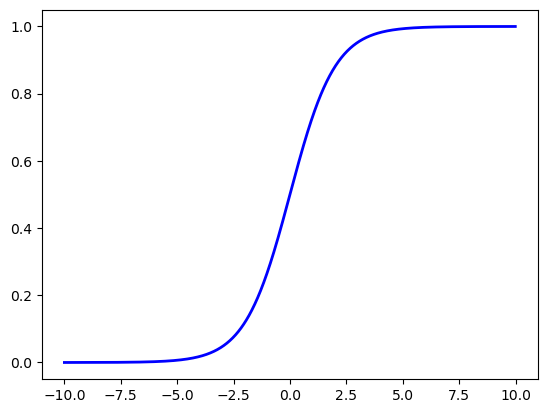

In [9]:
# Create a numpy array containing evenly separated numbers, from -10 to 10 
# (inclusive)
x = np.arange(-10, 10, .01)

# Call our sigmoid function on the newly created array
y = sigmoid(x)

# Plot
plt.plot(x, y, color='blue', lw=2)
plt.show()

<a id="logistic_loss"></a>
### Part 2.2 Logistic Loss

Now there's just one more building block we need: the `logistic loss` function, 
which also known as the `cross-entropy loss`. 
Intuitively, the loss function is simply a way to measure how far our prediction
$y_{\text{pred}} = \sigma(WX + b)$ is from the true label $y_{\text{true}}$.
Using the formulation covered in lecture and in the notes, implement the
logistic loss function in the cell below.

In [19]:
def logistic_loss(y_pred: np.ndarray, y_true: np.ndarray) -> float:
    """
    TODO: Implement the computation of the logistic loss function.

    Your function should take in not just a single predicted label
    and true label, but a vector of predictions and a vector of true labels.
    This shouldn't affect your implementation much, as numpy allows you to 
    operate naturally on vectors.

    Your function should return the average logistic loss over all the
    examples as a single float.

    Args:
        y_pred: A 1D vector of predicted labels for each example, of shape
        (num_examples,).
        y_true: A 1D vector of true labels for each example, of shape
        (num_examples,).

    Returns:
        float: The average logistic loss over all examples as a float.

    HINTS:
    * np.mean() and np.log() could be helpful!
    * If you run into "RuntimeWarning: divide by zero encountered in log" 
        issues, try adding a very small number epsilon (like 1e-8) to the 
        input any timE you call np.log(). This will ensure that the input to 
        the log is never exactly 0, which gives an undefined result.
    """
    # CODE START
    loss = - (y_true * np.log(y_pred + 1e-12) + (1-y_true) * np.log(1-y_pred + 1e-12)).mean() 
    return loss
    # CODE END

To check our implementation, let's compare it to our intuition about how the
loss should behave.
The loss is supposed to represent how far our prediction is from the true label. 
In other words, if our prediction is way off, the loss should be very high.
If our prediction gets closer to the true value, the loss should drop towards 
`0`.
Let's consider a few cases to understand how the loss should change on specific
input!

In [20]:
def print_loss(y_pred, y_true):
    print("Predicted = {}, True = {} : Loss = {}".format(
          y_pred, y_true, logistic_loss(np.array([y_pred]),
                                        np.array([y_true]))))

print_loss(0.0, 1)
print_loss(0.1, 1)
print_loss(0.3, 1)
print_loss(0.5, 1)
print_loss(0.7, 1)
print_loss(0.9, 1)
print_loss(0.99, 1)
print_loss(0.999999, 1)
print_loss(1, 1)


Predicted = 0.0, True = 1 : Loss = 27.631021115928547
Predicted = 0.1, True = 1 : Loss = 2.3025850929840455
Predicted = 0.3, True = 1 : Loss = 1.2039728043226028
Predicted = 0.5, True = 1 : Loss = 0.6931471805579453
Predicted = 0.7, True = 1 : Loss = 0.3566749439373039
Predicted = 0.9, True = 1 : Loss = 0.10536051565671518
Predicted = 0.99, True = 1 : Loss = 0.010050335852491371
Predicted = 0.999999, True = 1 : Loss = 9.999995000502107e-07
Predicted = 1, True = 1 : Loss = -1.000088900581841e-12


Take a look at the results.
What happens when $y_{pred} = y_{true}$? What happens when $y_{pred} = 0$ and 
$y_{true} = 1$?
Do they agree with what you expect from the formula for the logistic loss?
Why might this behavior be okay in practice, given how we are going to use the
`logistic loss` (i.e. `gradient descent`)?

<a id="gradient_descent"></a>
### Part 2.3 Gradient Descent

Now that you have implemented the `sigmoid()` and `logistic_loss()`
functions, our next step is to introduce our optimization function.
We will use the `gradient descent` algorithm to learn the parameters for our 
`logistic regression` classifier from the data.
We have implemented this algorithm for you, so you don't need to do anything
here.
We will have a deeper discussion on `gradient descent` in the context of neural
networks.
However, if you are interested we encourage you to take a look and try to
understand what the function is doing, as well as what each of the
parameters (`alpha`, `epsilon`, `num_iterations`) does.
You can also see how it makes use of the `sigmoid()` and `logistic_loss()`
functions we just implemented!

In [21]:
# DO NOT CHANGE
def gradient_descent(X: np.ndarray,
                     Y: np.ndarray,
                     batch_size: int = 2000,
                     alpha: float = 0.5,
                     num_iterations: int = 1000,
                     print_every: int = 100,
                     epsilon: float = 1e-8) -> (np.ndarray, float):
    """
    Runs batch gradient descent on the provided data and returns the resulting
    trained weight vector and bias.

    Args:
        X: A numpy array of shape (num_examples, num_features) containing
           the training data.
        Y: A numpy array of shape (num_examples,) containing the training
            labels.
        batch_size: The number of examples in each batch.
        alpha: The learning rate for gradient descent.
        num_iterations: The number of iterations to run gradient descent
                        for.
        print_every: How often (after how many iterations) to print the
                    loss and iteration number.
        epsilon: The early stopping condition. When the absolute change
                 in the loss is less than epsilon, gradient descent will
                 stop early.

    Returns:
        (np.ndarray, float): The learned weight vector W and bias b
    """
    # DO NOT CHANGE
    W = np.zeros((X.shape[1],))
    b = 0

    Y = np.array(Y)
    loss = 0
    for i in range(num_iterations):
        if batch_size >= X.shape[0]:
            X_batch = X
            Y_batch = Y
        else:
            batch_indices = np.random.randint(X.shape[0], size=batch_size)
            X_batch = X[batch_indices, :]
            Y_batch = Y[batch_indices]

        A = sigmoid(np.dot(X_batch, W) + b)
        dW = np.mean(np.expand_dims(A - Y_batch, axis=1) * X_batch, axis=0)
        db = np.mean(A - Y_batch)
        W -= alpha * dW
        b -= alpha * db
        prev_loss = loss
        loss = logistic_loss(A, Y_batch)

        if abs(prev_loss - loss) < epsilon:
            break

        if (i+1) % print_every == 0:
            predictions = A
            predictions[predictions >= 0.5] = 1
            predictions[predictions < 0.5] = 0
            accuracy = np.mean(predictions == Y_batch)
            print("Iteration {}/{}: Batch Accuracy: {},  Batch Loss = {}".format(
                i + 1,
                num_iterations,
                accuracy,
                loss
            ))

    return W, b


<a id="logistic_regression_classifier"></a>
### Part 2.4 Logistic Regression Classifier

Without any further ado, here is the skeleton code for the full 
`Logistic Regression` classifier.
Your task is to finish it up.
You will use the functions you have implemented above.

In [33]:
class LogisticRegressionClassifier(Classifier):
    """
    TODO: Implement the Logistic Regression classifier.
    """
    def __init__(self,
                 filter_stop_words: bool = None,
                 batch_size: int = 2000,
                 alpha: float = 0.5,
                 num_iterations: int = 1000,
                 print_every: int = 100,
                 epsilon: float = 1e-8):
        super().__init__(filter_stop_words)
        ngram = 1
        tokenizer = str.split if self.filter_stop_words else None

        """
        self.vectorizer is a countVectorizer we have created for you. Use
        it to obtain a feature vector of word counts for each example
        in your training data.
        Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
        """
        if self.stop_words is not None:
            self.stop_words = list(self.stop_words)
        self.vectorizer = CountVectorizer(min_df=20,
                                          ngram_range=(ngram, ngram),
                                          stop_words=self.stop_words,
                                          tokenizer=tokenizer)

        # Parameters to use for gradient_descent()
        self.batch_size = batch_size
        self.alpha = alpha
        self.num_iterations = num_iterations
        self.print_every = print_every
        self.epsilon = epsilon

        # TODO: Add other data structures needed in classify() or train()
        # CODE START
        self.W = None
        self.b = None 
        # CODE END

    def train(self, examples: List[Example]) -> None:
        """
        TODO: Implement a function to train a logistic regression model.

        Args:
            examples: A Python list containing instances of the Example class,
                which correspond to the datapoints in the dataset.

        HINTS:
        * Use the vectorizer we have defined (self.vectorizer) to convert each
            example into a feature vector of word counts. Read the documentation
            for the CountVectorizer. Is there a method you can use to do this?
        * Call gradient_descent() we have defined above to return the learned 
            weight vector and bias. You can save these for later use in 
            classify().
        * You should use the parameters (batch_size, alpha, num_iterations,
            print_every, epsilon) provided as arguments to the
            LogisticRegressionClassifier when calling gradient_descent().
        * Call self.X.toarray() after you have populated self.X with counts.
            This converts it from a sparse matrix to a dense matrix so
            we can use it to perform gradient descent.
        * Depending on your implementation, your model may take some time to 
            train!
        """
        # CODE START
        sentences = [" ".join(example.words) for example in examples]
        Y = np.array([example.label for example in examples])
        X = self.vectorizer.fit_transform(sentences).toarray()  # convert list of sentences to matrix of token counts
        self.W, self.b = gradient_descent(X, Y, self.batch_size, self.alpha, self.num_iterations, self.print_every, self.epsilon)
        # CODE END

    def classify(self, examples: List[Example],
                 return_scores: bool = False) -> Union[List[int], List[float]]:
        """
        TODO: Implement a function to classify the given examples!

        Args:
            examples: A Python list containing instances of the Example class,
                which correspond to the datapoints in the dataset.
            return_scores: A boolean flag indicating whether scores should

        Returns:
            Union[List[int], List[float]]: The classification result for each 
                example in a list. If the return_scores flag is False, the 
                function should return an object of type List[int], a list of 0 
                or 1, corresponding to each class.
                If the return_scores flag is True, the function should instead
                return an object of type List[float], the raw scores from the 
                sigmoid function.

        HINTS:
        * We use the `Union` class in the return type to indicate that it could
            be a List[int] or List[float], which indicate a list containing 
            integers or a list containings floats, respectively. Whether you 
            will return a list of int or float depends on the value of the 
            return_scores flag.
        * If sigmoid(X * W + b) is greater or equal to 0.5, the example
            belongs to class 1, which is the positive class. Otherwise, it 
            belongs to class 0, which is the negative class. You can use the 
            sigmoid function you implemented above.
        * You should use the weight vector and bias you computed earlier in 
            train().
        * You can use np.dot or np.matmul to do matrix multiplication.
        """
        # CODE START
        sentences = [" ".join(example.words) for example in examples]
        X = self.vectorizer.transform(sentences).toarray() 
        N,D = X.shape
        z = (X @ self.W.reshape(D,1) + self.b).reshape(N)
        scores = sigmoid(z)
        if return_scores:
            y_pred = scores
        else:
            y_pred = (scores > 0.5).astype(int)
        return y_pred     
        # CODE END

    def get_weights(self) -> np.ndarray:
        """
        TODO: Implement a function to return the trained weights.

        Returns:
            np.ndarray: Trained weights, a NumPy array in the sahpe 
                (num_features,).
        """
        # CODE START
        return self.W
        # CODE END

<a id="evaluation_triage"></a>
## Part 3. Evaluation on the Triage Dataset

### Part 3.1. Accuracy

Once your implementation is ready, you can try evaluating it on the disaster aid classification dataset as shown below.
Our implementation achieves the following statistics when run for the default number of iterations, so if you are getting similar results that probably means that your implementation is working well!

```
Performance on Unigrams, no stopword removal:
Accuracy (train): 0.7903164496816497
Accuracy (dev): 0.7726389428682472
Performance on Unigrams with stopword removal:
Accuracy (train): 0.7758243846811745
Accuracy (dev): 0.7602020987174505
```
Our `autograder` will test the accuracy achieved by your implementation of the `LogisticRegressionClassifier` on `train`, `dev`, and `test` datasets, both with and without stop words.
If you aren't getting the performance you are expecting in the below cell, go back to your `train` and `classify` methods.
If you are curious about the exact cutoffs we use to grade your work, you can submit your notebook to the autograder set up on `Gradescope`.

In [25]:
# Load our dataset
dataset = load_data("./data/triage")

In [44]:
print("Performance on Unigrams, no stopword removal:")
lr_classifier = LogisticRegressionClassifier(filter_stop_words=False, num_iterations=2000)
evaluate(lr_classifier, dataset)

print("Performance on Unigrams w/ stopword removal:")
lr_classifier_swr = LogisticRegressionClassifier(filter_stop_words=True)
evaluate(lr_classifier_swr, dataset)

print("Performance on Unigrams w/ stopword removal:")
lr_classifier_swr = LogisticRegressionClassifier(filter_stop_words=True, num_iterations=3000)
evaluate(lr_classifier_swr, dataset)

Performance on Unigrams, no stopword removal:
Iteration 100/2000: Batch Accuracy: 0.7165,  Batch Loss = 0.5612978271629014
Iteration 200/2000: Batch Accuracy: 0.7595,  Batch Loss = 0.5133647489330572
Iteration 300/2000: Batch Accuracy: 0.756,  Batch Loss = 0.5070992729607654
Iteration 400/2000: Batch Accuracy: 0.767,  Batch Loss = 0.49496735879247283
Iteration 500/2000: Batch Accuracy: 0.769,  Batch Loss = 0.4848563928794044
Iteration 600/2000: Batch Accuracy: 0.784,  Batch Loss = 0.48146553770196254
Iteration 700/2000: Batch Accuracy: 0.786,  Batch Loss = 0.464099594228296
Iteration 800/2000: Batch Accuracy: 0.7905,  Batch Loss = 0.4647577289232522
Iteration 900/2000: Batch Accuracy: 0.8035,  Batch Loss = 0.4567002048160297
Iteration 1000/2000: Batch Accuracy: 0.779,  Batch Loss = 0.46943686739795637
Iteration 1100/2000: Batch Accuracy: 0.796,  Batch Loss = 0.4545161600297879
Iteration 1200/2000: Batch Accuracy: 0.7775,  Batch Loss = 0.4687071404674035
Iteration 1300/2000: Batch Accur

/home/tanzid/miniconda3/envs/torch_clone/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Iteration 100/1000: Batch Accuracy: 0.7045,  Batch Loss = 0.5858653935638393
Iteration 200/1000: Batch Accuracy: 0.7455,  Batch Loss = 0.5495048355377419
Iteration 300/1000: Batch Accuracy: 0.7305,  Batch Loss = 0.5380703419004353
Iteration 400/1000: Batch Accuracy: 0.7525,  Batch Loss = 0.5138201343008195
Iteration 500/1000: Batch Accuracy: 0.7535,  Batch Loss = 0.5214281224413776
Iteration 600/1000: Batch Accuracy: 0.7745,  Batch Loss = 0.4914980043468991
Iteration 700/1000: Batch Accuracy: 0.769,  Batch Loss = 0.496344573402916
Iteration 800/1000: Batch Accuracy: 0.7775,  Batch Loss = 0.4920740411055401
Iteration 900/1000: Batch Accuracy: 0.785,  Batch Loss = 0.49257515778958755
Iteration 1000/1000: Batch Accuracy: 0.772,  Batch Loss = 0.4853419333525627
Accuracy (train): 0.7771072887959707
Accuracy (dev): 0.7621453556160125
Performance on Unigrams w/ stopword removal:
Iteration 100/3000: Batch Accuracy: 0.7265,  Batch Loss = 0.5695353381827184
Iteration 200/3000: Batch Accuracy: 0.

In [77]:
print("Performance on Unigrams, no stopword removal:")
lr_classifier = LogisticRegressionClassifier(filter_stop_words=False, batch_size=2000, num_iterations=1000, alpha=1.0)
evaluate(lr_classifier, dataset)

Performance on Unigrams, no stopword removal:
Iteration 100/1000: Batch Accuracy: 0.7695,  Batch Loss = 0.508847375933228
Iteration 200/1000: Batch Accuracy: 0.7765,  Batch Loss = 0.5005318430150377
Iteration 300/1000: Batch Accuracy: 0.784,  Batch Loss = 0.46973563253711736
Iteration 400/1000: Batch Accuracy: 0.781,  Batch Loss = 0.46950698245021133
Iteration 500/1000: Batch Accuracy: 0.793,  Batch Loss = 0.44986557439564184
Iteration 600/1000: Batch Accuracy: 0.7995,  Batch Loss = 0.4485884928245301
Iteration 700/1000: Batch Accuracy: 0.7875,  Batch Loss = 0.45414999384483146
Iteration 800/1000: Batch Accuracy: 0.7905,  Batch Loss = 0.453600855090268
Iteration 900/1000: Batch Accuracy: 0.813,  Batch Loss = 0.43529355611950293
Iteration 1000/1000: Batch Accuracy: 0.793,  Batch Loss = 0.4498096043869121
Accuracy (train): 0.8041433051411194
Accuracy (dev): 0.7761368052856588


In [78]:
print("Performance on Unigrams, no stopword removal:")
lr_classifier = LogisticRegressionClassifier(filter_stop_words=False, batch_size=2000, num_iterations=1500, alpha=1.0)
evaluate(lr_classifier, dataset)

Performance on Unigrams, no stopword removal:
Iteration 100/1500: Batch Accuracy: 0.736,  Batch Loss = 0.5261404352680387
Iteration 200/1500: Batch Accuracy: 0.7585,  Batch Loss = 0.5074265215887773
Iteration 300/1500: Batch Accuracy: 0.7735,  Batch Loss = 0.48224270976854894
Iteration 400/1500: Batch Accuracy: 0.7905,  Batch Loss = 0.4586253776693723
Iteration 500/1500: Batch Accuracy: 0.7755,  Batch Loss = 0.4644206925343478
Iteration 600/1500: Batch Accuracy: 0.779,  Batch Loss = 0.4563549611493524
Iteration 700/1500: Batch Accuracy: 0.7805,  Batch Loss = 0.47187028899592287
Iteration 800/1500: Batch Accuracy: 0.8075,  Batch Loss = 0.44649378806281265
Iteration 900/1500: Batch Accuracy: 0.818,  Batch Loss = 0.430078658202921
Iteration 1000/1500: Batch Accuracy: 0.804,  Batch Loss = 0.44877810407168955
Iteration 1100/1500: Batch Accuracy: 0.8275,  Batch Loss = 0.4129334813526369
Iteration 1200/1500: Batch Accuracy: 0.814,  Batch Loss = 0.4123579421947872
Iteration 1300/1500: Batch Ac

### Part 3.2 Sanity Check

Once we've implemented and trained our model, it's often helpful to do some investigating to confirm that it's behaving the way we expect. For a `Logistic Regression` model, there are couple of different ways we can do this.

If we think back to our `Naive Bayes` model, after training we have access to
the conditional probabilities for each word (`n-gram`) given each label.
We were able to examine them to get an idea of what words our model associates with each label.
For our  `Logistic Regression` model, after training we have access to a weight
vector that contains a weight for each feature.
We can connect these weights back to the list of features (in our case, these will be unigrams).

Features with larger weights are those that the model associates with the 
`positive` label, and those with smaller weights are those the model associates
with the `negative` label.
If it is not clear why this is true, try thinking back to the equation used
to compute the `Logistic Regression` output.
If a weight for a feature is a large positive number, and that 
feature appears in an example, what will happen to the output for 
that example?
What about a feature with a large negative weight?
Let's examine the features with the largest and smallest weights in our
trained classifier.

In [36]:
features = lr_classifier.vectorizer.get_feature_names_out()
weights = lr_classifier.get_weights()

features_to_weights = [(features[i], weights[i])
                    for i in range(len(features))]

In [37]:
top_10_features = sorted(features_to_weights,
                   key=operator.itemgetter(1), reverse=True)[:10]
for feature, weight in top_10_features:
    print("{}: weight = {}".format(feature, weight))

food: weight = 1.193210383941285
tents: weight = 1.0352110092041604
aid: weight = 0.9901824906459212
shelter: weight = 0.9722422176361448
tent: weight = 0.9653515133045751
victims: weight = 0.9544156535829694
help: weight = 0.862286775523544
relief: weight = 0.855018362414792
dead: weight = 0.8060853140414546
supplies: weight = 0.7941699356432952


In [38]:
bottom_10_features = sorted(features_to_weights,
                            key=operator.itemgetter(1))[:10]
for feature, weight in bottom_10_features:
    print("{}: weight = {}".format(feature, weight))

job: weight = -0.9404948441514978
santiago: weight = -0.5931922375797686
notes: weight = -0.4734453195669829
development: weight = -0.40437353778229207
message: weight = -0.39791526306428193
information: weight = -0.3845855660242935
level: weight = -0.3656021750450011
4636: weight = -0.36257731167522866
agriculture: weight = -0.3596085209942769
river: weight = -0.33779657028804116


**Reflection Question.**
Do these features agree with your intuition?
Return your answer in the `reflection_response` function below.

In [39]:
# TODO: Include your reflection below
def reflection_response():
    reflection = "Reflection"
    return reflection

**False Positives and Negatives.** Another good thing to check is where your model made errors. In this case, our
task was binary classification, so there are two possible types of errors
that could have occurred:

* `False Positives`: Our model predicted a high probability of label = 1 for a negative example.
* `False Negatives`: Our model predicted a low probability of label = 1 for a positive example.

We can look for exactly these two types of errors using the `return_scores`
flag we asked you to implement for the `classify()` method.

In [40]:
def get_false_negatives_and_false_positives(classifier, examples):
    predicted_scores = classifier.classify(examples, return_scores=True)

    false_negatives = []
    false_positives = []

    for pred_score, example in zip(
            predicted_scores, examples):
        if example.label == 1 and pred_score < 0.5:
            false_negatives.append((example.words, pred_score))
        elif example.label == 0 and pred_score >= 0.5:
            false_positives.append((example.words, pred_score))

    return false_negatives, false_positives

fn, fp = get_false_negatives_and_false_positives(lr_classifier, dataset.dev)

Now that we have the false negatives and false positives, we can find the
"worst" ones and examine them to try to figure out where our model went wrong.

The **worst** ones would be:
* The `false negatives` with the lowest probabilities of label = 1
* The `false positives` with the highest probabilities of label = 1

Run the cells below, and think about the following questions:
* Do these errors seem reasonable?
  Can you think of why the model may have made them?
  Are they similar to or different from the errors you saw from the `Naive Bayes` model?
* Did `Logistic Regression` outperform `Naive Bayes`?
  Did you expect it to?
  Why or why not?
* How do the different settings (stop word removal vs. no stop word removal) affect the 
  performance relative to each other? 
  Relative to `Naive Bayes`?
  Do these results seem reasonable?
  If not, what might explain what you're seeing?


In [43]:
top_10_fn = sorted(fn,
                   key=operator.itemgetter(1))[:10]
for words, prob in top_10_fn:
    print("prob = {}: {}...".format(prob, words))

prob = 0.055941340265079596: ["i'd", 'like', 'to', 'get', 'more', 'information', 'about', 'the', 'possibility', 'of', 'more', 'earthquakes', 'in', 'the', 'days', 'to', 'come', 'radio', 'caraibes', 'is', 'talking', 'about', 'it', 'but', 'they', 'did', 'not', 'finish', 'talking', 'w', 'believe', 'this', 'was', 'with', 'but', 'word', 'was', 'cut', 'off']...
prob = 0.08669513673612751: ['however', 'during', 'the', 'third', 'week', 'of', 'october', 'perhaps', 'in', 'reaction', 'to', 'the', 'untimely', 'rains', 'over', 'many', 'of', 'the', 'main', 'producing', 'areas', 'of', 'the', 'country', 'the', 'grain', 'market', 'research', 'project', 'reported', 'that', 'grain', 'flows', 'into', 'the', 'addis', 'ababa', 'market', 'decreased', 'and', 'that', 'there', 'was', 'an', 'unexpected', '22', 'increase', 'in', 'maize', 'prices']...
prob = 0.0936617530936241: ['raising', 'the', 'alert', 'status', 'to', 'level', '4', 'the', 'highest', 'level', 'would', 'trigger', 'mandatory', 'evacuations']...
pro

In [42]:
if len(fp) == 0:
    print("No false positives found!")

top_10_fp = sorted(fp, key=operator.itemgetter(1), reverse=True)[:10]
for words, prob in top_10_fp:
    print("prob = {}: {}".format(prob, words))

prob = 0.9972955668631143: ['these', 'communities', 'are', 'in', 'areas', 'experiencing', 'chronic', 'food', 'insecurity', 'environmental', 'problems', 'and', 'a', 'general', 'lack', 'of', 'basic', 'services', 'therefore', 'training', 'and', 'retraining', 'of', 'the', 'local', 'counterparts', 'leaders', 'of', 'groups', 'and', 'villages', 'as', 'well', 'as', 'the', 'local', 'staff', 'at', 'grassroots', 'level', 'is', 'essential', 'for', 'sustainable', 'implementation', 'of', 'the', 'activities', 'of', 'the', 'ngos', "it's", 'a', 'replica', 'of', 'an', 'ebola', 'treatment', 'unit', 'etu', 'where', 'doctors', 'nurses', 'hygienists', 'and', 'others', 'learn', 'how', 'to', 'safely', 'care', 'for', 'ebola', 'patients', 'while', 'staying', 'alive', 'logistics', 'a', 'total', 'of', 'two', 'access', 'routes', 'across', 'hardened', 'lava', 'flows', 'in', 'the', 'city', 'of', 'goma', 'have', 'been', 'opened', 'by', 'agro', 'action', 'allemande', 'aaa', 'with', 'funding', 'from', 'echo', 'ocha', '

Hopefully these questions have gotten you thinking about what your model
is doing and what its weaknesses and problems might be.

<a id="hyperparameters"></a>
## Part 4. Note on Hyperparameters

You can try adjusting the values of some of the arguments to `LogisticRegressionClassifier`, like `alpha` or `num_iterations`, re-running the evaluation, and seeing if the performance has changed.
We haven't really discussed what these values represent, but you should be able to notice that by adjusting them you can significantly change your model's performance!

These are examples of `hyperparameters` of our model.
You can think of them as adjustable settings that control how our model works and how it learns.
Oftentimes you will want to experiment with different choices for these parameters to find ones that work best and give the best possible performance.
This optimal choice of the hyperparameters will depend on the particular dataset/task as well.

## Ending Remarks

Congratulations, you are done with the assignment!
Refer to the [`Submitting`](#submitting) for submission instructions.